## 💥 Visualizzazione dell’Energia d’Impatto degli Asteroidi per Anno

Questo script Python permette di visualizzare i **10 asteroidi potenzialmente pericolosi** con l’**energia d’impatto più elevata** in un anno specificato, sfruttando dati da un file `asteroid.csv`.

### 📊 Cosa fa il codice:
- Legge i dati sugli **approcci ravvicinati** degli asteroidi.
- Calcola l'energia d'impatto stimata in **Megatoni di TNT** usando:
  \[
  E = \\frac{1}{2}mv^2
  \]
- Seleziona solo quelli **pericolosi** (`is_potentially_hazardous_asteroid = True`).
- Visualizza i top 10 in un **grafico a barre orizzontali**, con:
  - Sfumatura colore `plasma` (giallo → viola)
  - **Colorbar laterale** che indica l’energia




C:\Users\manue\AppData\Local\Temp\ipykernel_11100\409650241.py:72: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\manue\Desktop\Visualizzazione scientifica\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


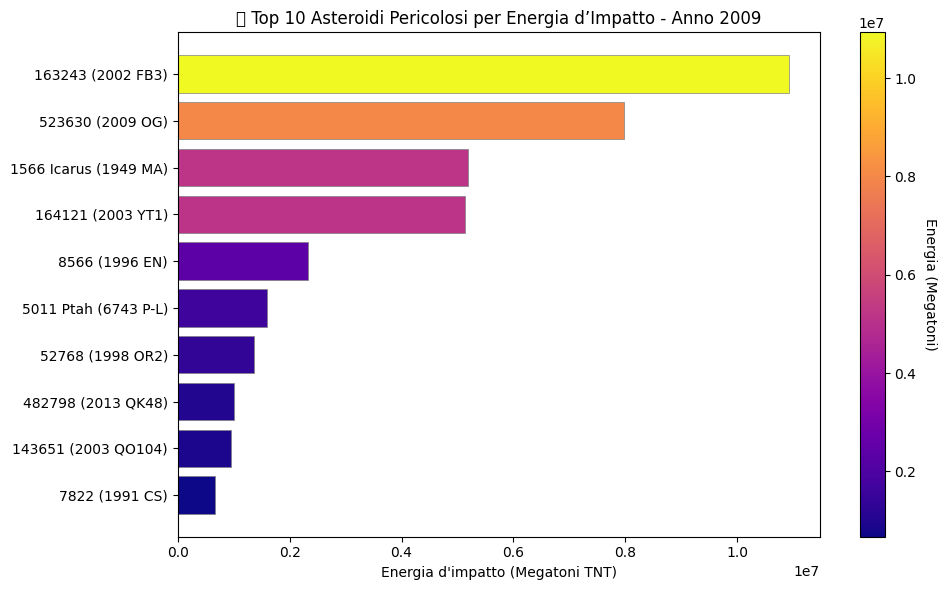

In [5]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# Costanti fisiche
DENSITY = 3000
JOULES_PER_MEGATON_TNT = 4.184e15

df = pd.read_csv('asteroid.csv')

def calcola_energia_impatti_per_anno(anno_target):
    risultati = []

    for _, row in df.iterrows():
        try:
            if not row['is_potentially_hazardous_asteroid']:
                continue

            approach_list = json.loads(row['approach_data'].replace("'", '"'))
            match_in_anno = [
                a for a in approach_list
                if a['close_approach_date'].startswith(str(anno_target))
            ]
            if not match_in_anno:
                continue

            for approach in match_in_anno:
                velocity_kph = float(approach['relative_velocity_kph'])
                velocity_mps = velocity_kph * 1000 / 3600
                diameter_km = row['estimated_diameter_km_max']
                radius_m = (diameter_km * 1000) / 2

                volume = (4/3) * np.pi * radius_m**3
                mass = DENSITY * volume
                energia_joule = 0.5 * mass * velocity_mps**2
                energia_megatoni = energia_joule / JOULES_PER_MEGATON_TNT

                risultati.append({
                    'name': row['name'],
                    'energy_megatons': energia_megatoni
                })

        except Exception:
            continue

    if not risultati:
        print(f"Nessun asteroide pericoloso registrato nell'anno {anno_target}")
        return

    top10 = pd.DataFrame(risultati).sort_values(by='energy_megatons', ascending=False).head(10)

    cmap = cm.plasma
    norm = Normalize(vmin=min(top10['energy_megatons']), vmax=max(top10['energy_megatons']))
    colors = [cmap(norm(val)) for val in top10['energy_megatons']]

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(top10['name'], top10['energy_megatons'], color=colors, edgecolor='gray', linewidth=0.5)
    ax.set_xlabel("Energia d'impatto (Megatoni TNT)")
    ax.set_title(f"💥 Top 10 Asteroidi Pericolosi per Energia d’Impatto - Anno {anno_target}")
    ax.invert_yaxis()

    # Colorbar laterale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label("Energia (Megatoni)", rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()

anno_input = input("Inserisci un anno (es. 2020): ")
calcola_energia_impatti_per_anno(anno_input)


## 🛰️ Distribuzione delle Dimensioni degli Asteroidi Pericolosi (per Anno)

Questo script analizza e visualizza la distribuzione delle **dimensioni degli asteroidi potenzialmente pericolosi** osservati in un anno specifico, utilizzando un **grafico a torta** suddiviso per fasce dimensionali.

---

### ⚙️ Funzionalità dello script:
- Carica dati da `asteroid.csv` (contenente info su diametri e avvicinamenti ravvicinati).
- Filtra solo gli asteroidi con `is_potentially_hazardous_asteroid = True`.
- Cerca avvicinamenti che sono avvenuti nell’anno inserito.
- Classifica ogni asteroide in base al **diametro massimo stimato**:
  - **Meteoroidi**: `< 1 km`
  - **Asteroidi medi/piccoli**: `1 – 2.5 km`
  - **Asteroidi grandi**: `2.5 – 5 km`
  - **Asteroidi giganti**: `≥ 5 km`


---

### 🎯 Utilità
- Evidenzia **quali categorie dimensionali** rappresentano il maggior rischio in un anno specifico.
- Aiuta a rispondere a domande come:
  - *“Gli asteroidi giganti sono davvero così frequenti?”*
  - *“Nel 2020, quali tipi di corpi pericolosi si sono avvicinati di più?”*
- Fornisce un riferimento visivo chiaro per scopi:
  - Divulgativi
  - Didattici
  - Analitici (studio di tendenze nel tempo)



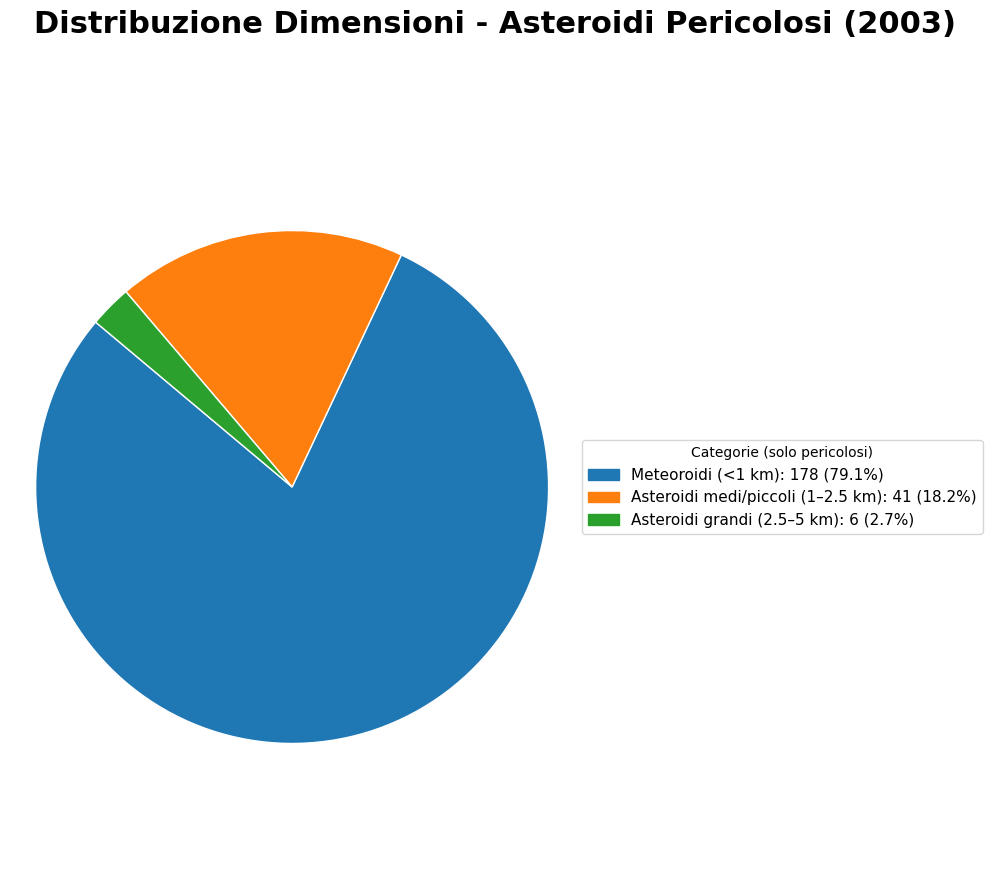

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Carica il dataset
df = pd.read_csv("asteroid.csv")

# Funzione per classificare gli asteroidi in base alla dimensione
def classifica_dimensione(d_km):
    if d_km < 1:
        return 'Meteoroidi (<1 km)'
    elif d_km < 2.5:
        return 'Asteroidi medi/piccoli (1–2.5 km)'
    elif d_km < 5:
        return 'Asteroidi grandi (2.5–5 km)'
    else:
        return 'Asteroidi giganti (≥5 km)'

# Funzione principale per creare il grafico
def grafico_dimensioni_pericolosi(anno_target):
    counts = {}

    for _, row in df.iterrows():
        try:
            if not row['is_potentially_hazardous_asteroid']:
                continue

            approaches = json.loads(row['approach_data'].replace("'", '"'))
            match_in_anno = [
                a for a in approaches
                if a['close_approach_date'].startswith(str(anno_target))
            ]
            if not match_in_anno:
                continue

            diametro = row['estimated_diameter_km_max']
            categoria = classifica_dimensione(diametro)
            counts[categoria] = counts.get(categoria, 0) + 1

        except:
            continue

    if not counts:
        print(f"Nessun asteroide pericoloso registrato nell'anno {anno_target}")
        return

    # Colori aggiornati (stile classico)
    label_colori = {
        'Meteoroidi (<1 km)': '#1f77b4',  # blu
        'Asteroidi medi/piccoli (1–2.5 km)': '#ff7f0e',  # arancione
        'Asteroidi grandi (2.5–5 km)': '#2ca02c',  # verde
        'Asteroidi giganti (≥5 km)': '#d62728'  # rosso
    }

    labels = [label for label in label_colori if counts.get(label, 0) > 0]
    sizes = [counts[label] for label in labels]
    colors = [label_colori[label] for label in labels]

    total = sum(sizes)
    legenda_testo = [
        f"{label}: {counts[label]} ({(counts[label]/total)*100:.1f}%)"
        for label in labels
    ]

    # Rettangolini colorati per la legenda
    patches = [Patch(color=label_colori[label], label=legenda_testo[i]) for i, label in enumerate(labels)]

    # Plot del grafico a torta
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.pie(
        sizes,
        labels=None,
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
    )

    # Titolo grande e vicino al grafico
    plt.suptitle(
        f'Distribuzione Dimensioni - Asteroidi Pericolosi ({anno_target})',
        fontsize=22,
        fontweight='bold',
        y=0.88  # 🔽 più vicino al grafico
    )

    # Legenda a lato
    ax.legend(
        handles=patches,
        title='Categorie (solo pericolosi)',
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=11
    )

    # Layout compatto
    plt.tight_layout(rect=[0, 0, 1, 0.85])
    plt.axis('equal')
    plt.show()

# Esecuzione
anno_input = input("Inserisci un anno (es. 2020): ")
grafico_dimensioni_pericolosi(anno_input)


## ☄️ Percentuale di Asteroidi Pericolosi per Categoria Dimensionale

Questo script analizza e visualizza la **percentuale di asteroidi potenzialmente pericolosi** in relazione alla loro **dimensione massima stimata** (`estimated_diameter_km_max`), classificandoli in 4 categorie.

---

### ⚙️ Funzionalità dello script:
- Classifica gli asteroidi in base alla loro dimensione:
  - **Small**: < 1 km
  - **Medium**: 1 – 2.5 km
  - **Large**: 2.5 – 5 km
  - **Giant**: ≥ 5 km
- Calcola la percentuale di asteroidi pericolosi (`is_potentially_hazardous_asteroid == True`) per ciascuna categoria.
- Visualizza i dati in un **grafico a barre colorato**, con etichette leggibili al centro delle barre.

---

### 🎨 Visualizzazione:
- Colori distinti per ogni categoria (blu, arancione, verde, rosso)
- Percentuali **scritte dentro ogni barra**
- Legenda verticale laterale con **categorie presenti nei dati**
- Griglia e assi ottimizzati per leggibilità

---

### 📊 Utilità:
> Questa visualizzazione consente di capire se **la pericolosità degli asteroidi è correlata alla loro dimensione**.  
Per esempio, si può osservare se gli oggetti più grandi sono più frequentemente etichettati come “potenzialmente pericolosi”.





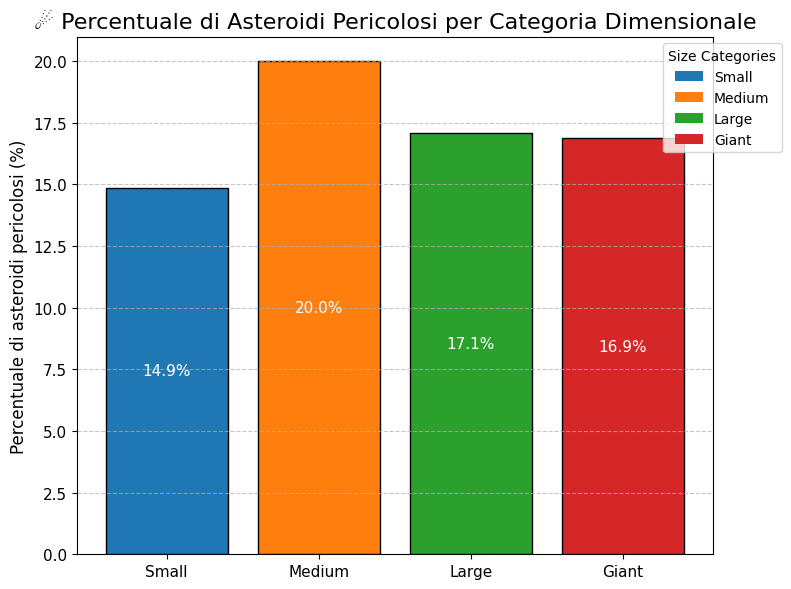

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Carica il dataset
df_asteroid = pd.read_csv('asteroid.csv')

# Classificazione semplice

def assign_size_category(diameter):
    if diameter < 1:
        return 'Small'
    elif diameter < 2.5:
        return 'Medium'
    elif diameter < 5:
        return 'Large'
    else:
        return 'Giant'

# Applica la classificazione
df_asteroid['size_category'] = df_asteroid['estimated_diameter_km_max'].apply(assign_size_category)

# Calcolo percentuale di asteroidi pericolosi per categoria
per_category = df_asteroid.groupby('size_category')['is_potentially_hazardous_asteroid'].mean() * 100

# Ordine forzato
categories = ['Small', 'Medium', 'Large', 'Giant']
per_category = per_category.reindex(categories, fill_value=0)

# Colori classici (come nel tuo primo codice)
colors = {
    'Small': '#1f77b4',   # blu
    'Medium': '#ff7f0e',  # arancione
    'Large': '#2ca02c',   # verde
    'Giant': '#d62728'    # rosso (opzionale se ci sono giganti)
}
used_colors = [colors[cat] for cat in categories]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, per_category.values, color=used_colors, edgecolor='black')

# Percentuali dentro le barre
for bar, cat in zip(bars, categories):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5,
            f"{per_category[cat]:.1f}%",
            ha='center', va='center', fontsize=11, color='white' if height > 10 else 'black')

# Titolo e assi
plt.title('☄️ Percentuale di Asteroidi Pericolosi per Categoria Dimensionale', fontsize=16)
plt.xlabel('')
plt.ylabel('Percentuale di asteroidi pericolosi (%)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legenda verticale (solo categorie con dati > 0)
patches = [Patch(facecolor=colors[cat], label=cat) for cat in categories if per_category[cat] > 0]
ax.legend(handles=patches, title='Size Categories', loc='upper right', bbox_to_anchor=(1.12, 1))

plt.tight_layout()
plt.show()


## ☄️ Confronto tra Asteroidi Pericolosi e Meteoriti Caduti (per Anno)

Questo script confronta il numero di **asteroidi potenzialmente pericolosi** che si sono avvicinati alla Terra con il numero di **meteoriti effettivamente caduti** nello stesso anno, fornendo anche una visualizzazione a barre e una percentuale comparativa.

---

### ⚙️ Funzionalità dello script:
- Carica i dataset:
  - `asteroid.csv` per gli oggetti potenzialmente pericolosi (PHA)
  - `meteorite_landings.csv` per i meteoriti registrati
- Filtra:
  - Solo oggetti con `is_potentially_hazardous_asteroid == True`
  - Solo meteoriti con `fall == 'Fell'`
- Calcola per un anno inserito:
  - Il numero di avvicinamenti di asteroidi pericolosi
  - Il numero di meteoriti effettivamente caduti
  - La **percentuale di cadute** rispetto agli avvicinamenti

### 🎯 Utilità
- Mette a confronto il numero di **minacce potenziali** con gli **impatti reali**.
- Fornisce un contesto utile per capire:
  - Quanti PHA si avvicinano senza impattare
  - L'effettiva frequenza di impatti osservabili



🛰️ Asteroidi potenzialmente pericolosi avvicinatisi nel 2003: 252
☄️ Meteoriti effettivamente caduti nel 2003: 9
📊 Percentuale meteoriti caduti rispetto agli asteroidi pericolosi: 3.57%


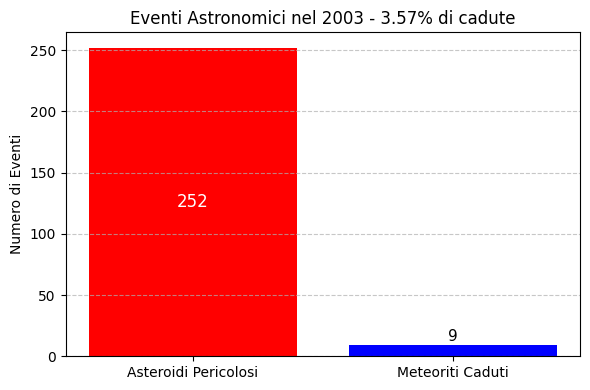

In [ ]:

import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import defaultdict

# Caricamento file CSV
df_asteroid = pd.read_csv('asteroid.csv')
df_meteorite = pd.read_csv('meteorite_landings.csv')

# Filtra solo asteroidi potenzialmente pericolosi
asteroid_hazardous = df_asteroid[df_asteroid['is_potentially_hazardous_asteroid'] == True]

# Prepara dati meteoriti
df_meteorite = df_meteorite[pd.to_numeric(df_meteorite['year'], errors='coerce').notnull()]
df_meteorite['year'] = df_meteorite['year'].astype(int)
df_falls = df_meteorite[df_meteorite['fall'] == 'Fell']

def eventi_anno_specifico(anno_input):
    # Conta avvicinamenti di asteroidi pericolosi in quell'anno
    count_hazardous = 0
    for row in asteroid_hazardous['approach_data']:
        try:
            approaches = ast.literal_eval(row)
            for approach in approaches:
                if int(approach['close_approach_date'][:4]) == anno_input:
                    count_hazardous += 1
        except Exception:
            continue

    # Conta meteoriti caduti in quell'anno
    falls_in_year = df_falls[df_falls['year'] == anno_input].shape[0]

    return count_hazardous, falls_in_year

# Input utente
try:
    anno = int(input("Inserisci un anno (es. 1995): "))
    pericolosi, caduti = eventi_anno_specifico(anno)

    # Calcolo percentuale (evitando divisione per zero)
    if pericolosi > 0:
        percentuale = (caduti / pericolosi) * 100
    else:
        percentuale = 0

    # Output testo
    print(f"\n🛰️ Asteroidi potenzialmente pericolosi avvicinatisi nel {anno}: {pericolosi}")
    print(f"☄️ Meteoriti effettivamente caduti nel {anno}: {caduti}")
    print(f"📊 Percentuale meteoriti caduti rispetto agli asteroidi pericolosi: {percentuale:.2f}%")

    # Grafico
    plt.figure(figsize=(6, 4))
    values = [pericolosi, caduti]
    labels = ['Asteroidi Pericolosi', 'Meteoriti Caduti']
    colors = ['red', 'blue']
    bars = plt.bar(labels, values, color=colors)

    # Annotazioni
    for bar in bars:
        height = bar.get_height()
        if height < 20:
            # Valori bassi -> etichetta sopra la barra
            plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
                     f"{int(height)}", ha='center', va='bottom', fontsize=11, color='black')
        else:
            # Etichetta centrata nella barra
            plt.text(bar.get_x() + bar.get_width() / 2, height * 0.5,
                     f"{int(height)}", ha='center', va='center', fontsize=12, color='white')

    plt.title(f"Eventi Astronomici nel {anno} - {percentuale:.2f}% di cadute")
    plt.ylabel('Numero di Eventi')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except ValueError:
    print("Per favore inserisci un numero valido.")


## 📊 Analisi degli Asteroidi Potenzialmente Pericolosi per Anno

Questo report visualizza il numero di **asteroidi potenzialmente pericolosi** che si sono avvicinati alla Terra per ogni anno, utilizzando i dati forniti nel file `asteroid.csv`.

---

### 🧪 Obiettivo dell'Analisi

L'obiettivo principale del grafico è rispondere alla domanda:

> #**"Ogni anno ci sono più o meno lo stesso numero di asteroidi potenzialmente pericolosi che si avvicinano alla Terra?"**

Per farlo, analizziamo:

- **Distribuzione annuale** degli asteroidi pericolosi.
- **Media** degli avvicinamenti annuali.
- **Deviazione standard** per valutare la variabilità tra gli anni.

---

### 🖼️ Descrizione del Grafico

- L'**asse Y** mostra il numero di avvicinamenti pericolosi registrati.
- Le **barre** sono ordinate dal valore massimo al minimo (anno con più avvicinamenti → anno con meno).
- Il **colore delle barre** va dal **giallo (più asteroidi)** al **viola (meno asteroidi)** grazie a una scala sfumata.
- Una **linea grigia** rappresenta la **media** degli asteroidi pericolosi all'anno.
- Due **linee rosse** rappresentano la **deviazione standard** sopra e sotto la media (`±1σ`), che indica se ci sono variazioni significative.

---

### 📈 Risultati Statistici

- **Media**: ~249 asteroidi pericolosi all’anno.
- **Deviazione Standard**: ~23.7 → indica una **moderata variazione** da un anno all’altro.

---

### ✅ Conclusione

Questo tipo di visualizzazione è utile per:

- Verificare se **certi anni sono eccezionalmente più rischiosi**.
- Capire **quanto è stabile nel tempo** il numero di asteroidi pericolosi.
- Supportare decisioni in campo scientifico e governativo riguardo a **monitoraggio e prevenzione**.




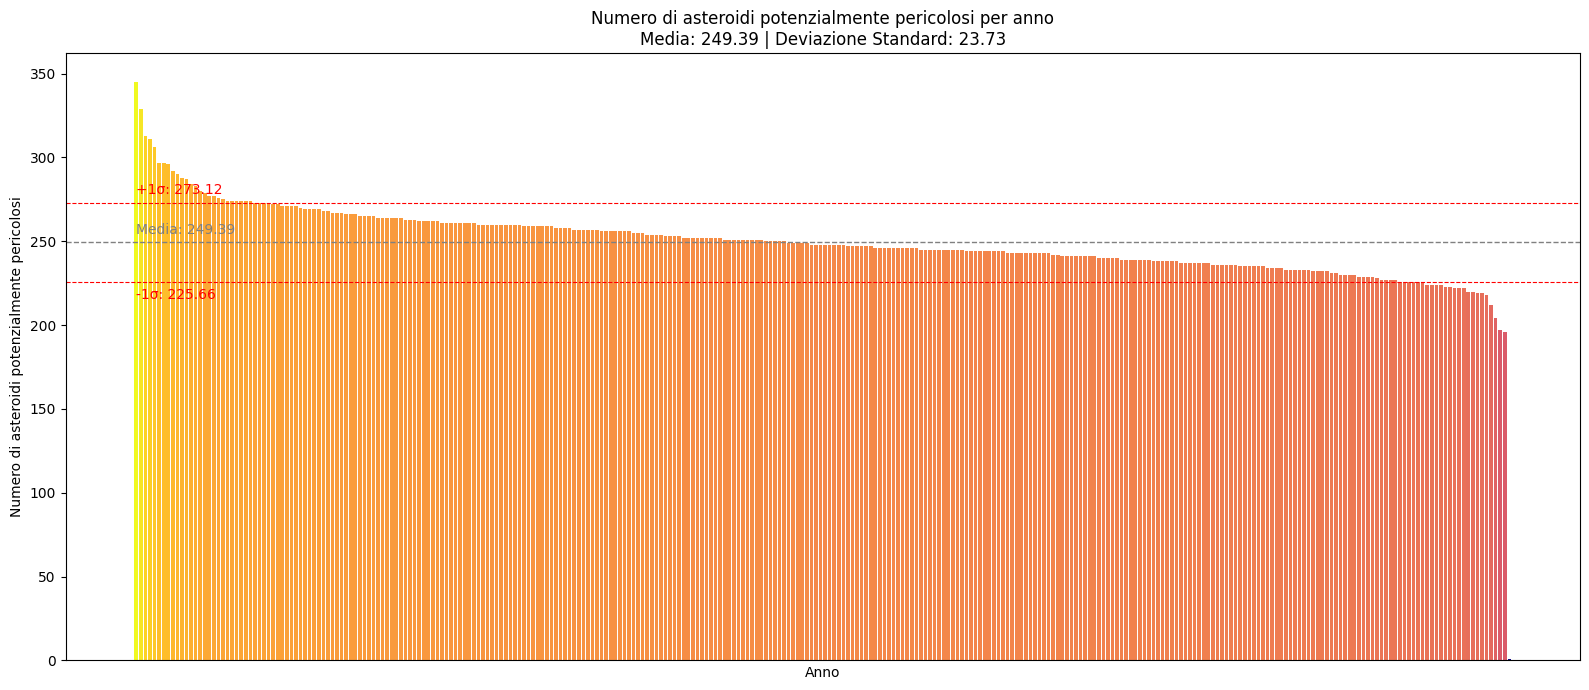

In [7]:
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Carica il dataset
df = pd.read_csv("asteroid.csv")

# Conta asteroidi potenzialmente pericolosi per anno
hazardous_by_year = defaultdict(int)

for _, row in df.iterrows():
    if row["is_potentially_hazardous_asteroid"]:
        try:
            approach_list = json.loads(row["approach_data"].replace("'", '"'))
            for approach in approach_list:
                year = int(approach['close_approach_date'][:4])
                hazardous_by_year[year] += 1
        except Exception:
            continue

# Crea DataFrame e ordina in modo decrescente
hazardous_df = pd.DataFrame(list(hazardous_by_year.items()), columns=['Year', 'Hazardous_Asteroids'])
hazardous_df = hazardous_df.sort_values(by='Hazardous_Asteroids', ascending=False)

# Calcola media e deviazione standard
media = hazardous_df['Hazardous_Asteroids'].mean()
dev_std = hazardous_df['Hazardous_Asteroids'].std()

# Crea sfumatura colore dal giallo (alto) al viola (basso)
norm = mcolors.Normalize(vmin=hazardous_df['Hazardous_Asteroids'].min(),
                         vmax=hazardous_df['Hazardous_Asteroids'].max())
colors = cm.plasma(norm(hazardous_df['Hazardous_Asteroids']))

# Grafico
plt.figure(figsize=(16, 7))
plt.bar(hazardous_df['Year'].astype(str), hazardous_df['Hazardous_Asteroids'], color=colors)
plt.xticks([], [])  # Nessuna etichetta asse X
plt.xlabel("Anno")
plt.ylabel("Numero di asteroidi potenzialmente pericolosi")
plt.title(f"Numero di asteroidi potenzialmente pericolosi per anno\n"
          f"Media: {media:.2f} | Deviazione Standard: {dev_std:.2f}")

# Linee orizzontali per media e deviazioni standard
plt.axhline(media, color='gray', linestyle='--', linewidth=1)
plt.text(0, media + 5, f"Media: {media:.2f}", color='gray')

plt.axhline(media + dev_std, color='red', linestyle='--', linewidth=0.8)
plt.axhline(media - dev_std, color='red', linestyle='--', linewidth=0.8)
plt.text(0, media + dev_std + 5, f"+1σ: {media + dev_std:.2f}", color='red')
plt.text(0, media - dev_std - 10, f"-1σ: {media - dev_std:.2f}", color='red')

plt.tight_layout()
plt.show()



# 🛰️ Analisi: Diametro vs Distanza minima di avvicinamento

## ✅ Cosa mostra il grafico

- **Asse X**: distanza minima di avvicinamento degli asteroidi alla Terra (in km), su scala **logaritmica**.
- **Asse Y**: diametro massimo stimato dell’asteroide (in km).
- Ogni **punto** rappresenta un avvicinamento di un asteroide alla Terra.
- Il **colore del punto** indica la **velocità relativa** dell’asteroide (più chiaro = più veloce).
- È stata calcolata la **correlazione di Pearson** tra distanza e diametro.

---

## 📌 Leggibilità

- La scala logaritmica sull’asse X migliora la lettura, poiché molte osservazioni sono concentrate tra **1 milione e 10 milioni di km**, ma ci sono anche valori fino a **100 milioni**.
- L’uso del colore (mappa viridis) rende visibile la distribuzione delle velocità relative.

---

## 💻 Spiegazione del codice

1. **Estrazione dati**:
   - Si filtrano solo gli avvicinamenti alla **Terra** (`orbiting_body == 'Earth'`).
   - Si raccolgono `diameter`, `miss_distance_km`, `relative_velocity_kph`, e flag di pericolosità.

2. **Analisi statistica**:
   - Si calcola la **correlazione di Pearson** tra distanza e diametro per verificare eventuali relazioni lineari.

3. **Visualizzazione**:
   - Si usa `plt.scatter()` con:
     - `xscale('log')` per la distanza.
     - `c=velocities` e `cmap='viridis'` per mappare il colore alla velocità.
   - Il **colorbar** mostra la leggenda delle velocità.

---

## 📈 Considerazioni aggiuntive

- Si potrebbe replicare lo stesso tipo di analisi usando solo **asteroidi potenzialmente pericolosi**, oppure includere **il tempo** come terza variabile con animazioni o layer interattivi.


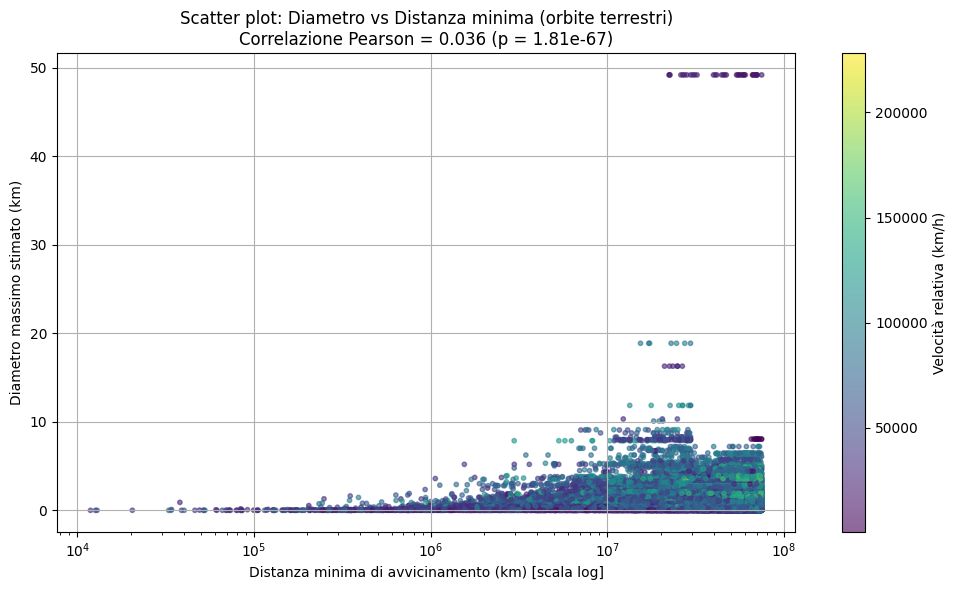

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carica il dataset
df = pd.read_csv("asteroid.csv")

# Estrazione dati
diameters = []
min_distances = []
velocities = []

for _, row in df.iterrows():
    try:
        diameter = row["estimated_diameter_km_max"]
        if pd.isna(diameter):
            continue
        approach_data = json.loads(row["approach_data"].replace("'", '"'))
        for approach in approach_data:
            if approach.get("orbiting_body") == "Earth":
                distance = float(approach["miss_distance_km"])
                velocity = float(approach["relative_velocity_kph"])

                diameters.append(diameter)
                min_distances.append(distance)
                velocities.append(velocity)
    except Exception:
        continue

# Calcolo della correlazione
corr, pval = pearsonr(min_distances, diameters)

# Plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(min_distances, diameters, c=velocities, cmap='viridis', alpha=0.6, s=10)
plt.xscale('log')
plt.colorbar(sc, label="Velocità relativa (km/h)")
plt.xlabel("Distanza minima di avvicinamento (km) [scala log]")
plt.ylabel("Diametro massimo stimato (km)")
plt.title(f"Scatter plot: Diametro vs Distanza minima (orbite terrestri)\n"
          f"Correlazione Pearson = {corr:.3f} (p = {pval:.2e})")
plt.grid(True)
plt.tight_layout()
plt.show()




## 📊 Conclusioni sull'analisi: Diametro vs Distanza minima di avvicinamento

#### ✅ 1. Nessuna correlazione rilevante tra distanza e diametro

- Il coefficiente di correlazione di **Pearson = 0.036** è:
  - Molto vicino a zero → suggerisce **assenza di relazione lineare** tra il diametro dell’asteroide e la sua distanza minima di avvicinamento alla Terra.
  - Il **p-value molto basso** è dovuto al grande numero di osservazioni: significa che è statisticamente significativo, ma **non rilevante dal punto di vista pratico**.

---

#### 📌 2. La maggior parte degli asteroidi ha diametri piccoli

- La fascia più densa di punti è concentrata **sotto i 5 km di diametro**.
- Questi piccoli oggetti sono **presenti a tutte le distanze**, anche molto vicine alla Terra.

---

#### 📊 3. Gli oggetti grandi non sono necessariamente più vicini

- Asteroidi di **diametro > 20 km** (fino a circa 50 km) si trovano spesso a **distanze molto elevate** (oltre 10⁷ km).
- Non c’è evidenza che gli oggetti grandi rappresentino un **rischio maggiore in termini di vicinanza**.

---

#### 🌈 4. Colorazione per velocità: ampia variabilità

- Il colore dei punti nel grafico (da viola a giallo) mostra la **velocità relativa** degli asteroidi:
  - Anche asteroidi **lenti** possono avvicinarsi molto.
  - Non emerge una relazione chiara tra **velocità e distanza minima**.

---

#### 🛰️ 5. Implicazioni pratiche

- Le **dimensioni da sole non bastano** per valutare la pericolosità di un asteroide.
- È fondamentale monitorare anche **oggetti piccoli**, perché possono avvicinarsi molto.
- La **velocità** è una variabile critica per stimare l’**energia di impatto potenziale** e il rischio effettivo.
